In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [5]:
!unzip '/content/drive/MyDrive/DATASETS/titanic.zip' -d '/content/titanic'

Archive:  /content/drive/MyDrive/DATASETS/titanic.zip
  inflating: /content/titanic/gender_submission.csv  
  inflating: /content/titanic/test.csv  
  inflating: /content/titanic/train.csv  


In [19]:
import numpy as np 
import pandas as pd
import seaborn as sb

In [64]:
train_raw_df = pd.read_csv('/content/titanic/train.csv')
test_raw_df = pd.read_csv('/content/titanic/test.csv')

In [65]:
train_raw_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [66]:
train_raw_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [67]:
train_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [68]:
train_raw_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


### feature meanings:

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...

    Sibling = brother, sister, stepbrother, stepsister

    Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...

    Parent = mother 1, father 2

    Child = daughter 3, son 4, stepdaughter 5, stepson 6

    Some children travelled only with a nanny, therefore parch=0 for them.

useful features: Pclass, Sex, Age, Parch, SipSp, Cabin, Embarked

labels: Survived

In [69]:
train_raw_df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [70]:
train_raw_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [71]:
train_raw_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

gotta fill values for age and embarked

gotta check correlation to select features

In [72]:
train_raw_df['Embarked'].fillna('S', inplace=True)
test_raw_df['Embarked'].fillna('S', inplace=True)

In [74]:
train_raw_df['Age'].fillna(train_raw_df['Age'].median(), inplace=True)
test_raw_df['Age'].fillna(test_raw_df['Age'].median(), inplace=True)

In [75]:
train_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [76]:
test_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [77]:
test_raw_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [78]:
# label encoding: Sex, Embarked

from sklearn.preprocessing import LabelEncoder
le_s = LabelEncoder()
train_raw_df['Sex'] = le_s.fit_transform(train_raw_df['Sex'])
test_raw_df['Sex'] = le_s.transform(test_raw_df['Sex'])
print(le_s.classes_)
le_e = LabelEncoder()
train_raw_df['Embarked'] = le_e.fit_transform(train_raw_df['Embarked'])
test_raw_df['Embarked'] = le_e.transform(test_raw_df['Embarked'])
print(le_e.classes_)

['female' 'male']
['C' 'Q' 'S']


In [79]:
train_raw_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


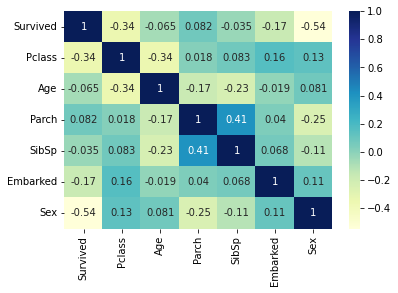

In [80]:
sb.heatmap(train_raw_df[['Survived', 'Pclass', 'Age', 'Parch','SibSp', 'Embarked', 'Sex']].corr(), cmap="YlGnBu", annot=True)

In [81]:
train_df = train_raw_df[['Survived','Age','Parch','SibSp','Embarked','Sex','Pclass']]

In [82]:
train_df.head()

,Survived,Age,Parch,SibSp,Embarked,Sex,Pclass
0,0,22.0,0,1,2,1,3
1,1,38.0,0,1,0,0,1
2,1,26.0,0,0,2,0,3
3,1,35.0,0,1,2,0,1
4,0,35.0,0,0,2,1,3


same for test df

In [83]:
test_df = test_raw_df[['Age','Parch','SibSp','Embarked','Sex','Pclass']]

In [84]:
test_df.head()

,Age,Parch,SibSp,Embarked,Sex,Pclass
0,34.5,0,0,1,1,3
1,47.0,0,1,2,0,3
2,62.0,0,0,1,1,2
3,27.0,0,0,2,1,3
4,22.0,1,1,2,0,3


In [94]:
# splitting data

X_train = train_df.iloc[:,1:].values
y_train = train_df.iloc[:,0].values
X_test = test_df.values

print(X_train.shape, X_test.shape)
print(y_train.shape) # y_test shape: (418,)

(891, 6) (418, 6)
(891,)


## Training with multiple models

In [85]:
# model imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [86]:
rfc = RandomForestClassifier()
lr = LogisticRegression()
svc = SVC(gamma='auto')

In [ ]:
rfc.fit(X_train,y_train)
lr.fit(X_train,y_train)
svc.fit(X_train,y_train)

In [97]:
y_pred_rfc = rfc.predict(X_test)
y_pred_lr = lr.predict(X_test)
y_pred_svc = svc.predict(X_test)

In [99]:
# training accuracy 

from sklearn.metrics import accuracy_score

print(f"random forests accuracy: {accuracy_score(y_train, rfc.predict(X_train))}")
print(f"logistic regression accuracy: {accuracy_score(y_train, lr.predict(X_train))}")
print(f"support vector machines accuracy: {accuracy_score(y_train, svc.predict(X_train))}")

random forests accuracy: 0.936026936026936
logistic regression accuracy: 0.797979797979798
support vector machines accuracy: 0.8653198653198653


In [112]:
submission_df = pd.DataFrame(columns=['PassengerId','Survived'])
submission_df['PassengerId'] = test_raw_df['PassengerId']
submission_df['Survived'] = y_pred_rfc
submission_df.to_csv('/content/titanic/submission.csv', index=False)

In [113]:
submission_df2 = pd.DataFrame(columns=['PassengerId','Survived'])
submission_df2['PassengerId'] = test_raw_df['PassengerId']
submission_df2['Survived'] = y_pred_lr
submission_df2.to_csv('/content/titanic/submission2.csv', index=False)

In [ ]:
submission_df3 = pd.DataFrame(columns=['PassengerId','Survived'])
submission_df3['PassengerId'] = test_raw_df['PassengerId']
submission_df3['Survived'] = y_pred_svc
submission_df3.to_csv('/content/titanic/submission3.csv', index=False)

## Kaggle Scores

support vector machines:  0.71531

logistic regression: 0.75837

random forest classifier: 0.68899

what I should've done differently:

split train_df into train and validation since we did not have y_test values

but yeah it was nice to finally submit something on Kaggle even if its something common such as Titanic dataset :)